In [ ]:
#PRIMER LINEA= Derivada de forma simbolica, es decir con la expresión, para esto se importa Sympy
# SEGUNDA LÍNEA= Evaluando cada valor, método númerico= Método de diferencias divididas fnitas,
#Se realiza con diferencias centradas

import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol
from scipy.misc import derivative
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

In [2]:
#Para encontrar la derivada de forma symbolica
x=Symbol('x')
y=2*x**3
#Con respecto a que se va a derivar
derivada=y.diff(x)
print(derivada)

6*x**2


In [3]:
#Otra forma de encontrar la derivada pero evaluandola en un valor
f= lambda x: 2*x**3
#f es la función, el valor (1) es donde se quiere evaluar, dx=1e-6 es la diferencia
#Del valores que hay por el método que utiliza
print(derivative(f,1,dx=1e-6))

5.999999999839467


In [9]:
#DIFERENCIAS FINITAS CENTRADAS


#En este ejemplo se va a trabajar con la función x^3+x^2+x+3
def funcion(x):
    resultado=pow(x,3)+pow(x,2)+x+3
    return resultado

def derivada(x):
#recuerde que h es el valor de paso, entre más pequeño más exacta
#Esta es la primera derivada por método de diferencias finitas centradas (ver PDF)
    derivada1=(funcion(x+h)-funcion(x-h))/(2*h)
    return derivada1

def derivada4(x):
    derivada1=(-funcion(x+h*2)+8*funcion(x-h)+funcion(x-h*2))/(12*h)
    return derivada1

x=float(input('¿En que valor deseas calcular la derivada?'))
h=float(input('introduce el valor de h: '))

print(derivada(x))
print(derivada4(x))

#Recuerdar la función está arriba y se sustituye el valor de 3


¿En que valor deseas calcular la derivada?3
introduce el valor de h: 0.25
34.0625
79.54166666666667



# IMPORTANTE

A partir de este momento se intentará implementar el método, una de las fuentes guia es Finite Difference Computing with PDEs - A Modern Software Approach de Hans Petter Langtangen y Svein Linge (Se encontrará en el repositorio). 

La metodología es:

1) Hacer ejemplos que quizá se consigan en el libro

2) recoger ideas para solucionar la ecuación de calor.

3) En el PDF se encontrará la solución pero se deberá cambiar la condiciones de frontera que se presenta en el documento. Afirmar algunas cosas que se tiene en duda  con las condiciones de frontera. 

PREGUNTAS: En la ecuación de calor se mira si es solución estable, se observará lo mismo en Python?

### Ejemplo 1

Ecuación $u''+w^{2}u=0$ con $u(0)=I$, $u'(0)=0$, $t \in (0,T]$ y $u(t)=Icos(wt)$

In [10]:
#
#Se debe hacer una malla
def solver(I, w, dt, T):
    dt = float(dt)
    Nt = int(round(T/dt))
    
#Matriz
    u = np.zeros(Nt+1)
    
#Para formar la malla
    t = np.linspace(0, Nt*dt, Nt+1) 
    
#Condiciones iniciales
    u[0] = I
    
#Especificar también esta linea, Preguntar?
    u[1] = u[0] - 0.5*dt**2*w**2*u[0]
    
#APLICANDO EL MÉTODO DE DIFERENCIAS FINITAS
    for n in range(1, Nt):
        u[n+1] = 2*u[n] - u[n-1] - dt**2*w**2*u[n]
    return u, t


In [12]:
#Como se definio u(t) en la ecuación
def u_exact(t, I, w):
    return I*np.cos(w*t)

#Los datos que es claro que se deben entrar

#I = 1
#w = 2*pi
#dt = 0.05
#num_periods = 5
#P = 2*pi/w # one period
#T = P*num_periods
#u, t = solver(I, w, dt, T)

### Ejemplo 2

La solución de

$\frac{\partial ^{2}u}{\partial t^2}=c^2\frac{\partial ^{2}u}{\partial x^{2}}$ con $x \in (0,L), t \in (0,T]$

$u(x,0)=I(x)$ con  $x \in [0,L]$
$\frac{\partial}{\partial t}u(x,0)=0$ con $x \in [0,L]$

$u(0,t)=0$ con  $t \in (0,T]$
$u(L,t)=0$ con $t \in (0,T]$

In [6]:
def solver(I, V, f, c, L, dt, C, T, user_action=None):
    #Número de intervalos con respecto al tiempo
    Nt = int(round(T/dt))
    #Creación de la malla de puntos en el tiempo
    t = np.linspace(0, Nt*dt, Nt+1) 
    dx = dt*c/float(C)
    #Número de intervalos en x
    Nx = int(round(L/dx))
    #Malla
    x = np.linspace(0, L, Nx+1)
    C2 = C**2 # El c^2 que tiene la formula dada
    dx = x[1] - x[0]
    dt = t[1] - t[0]
    
    
#ESTA F ES COMO NO ESTA DEFINIDA ENTONCES POR ESO COLOCO CERO
    if f is None or f == 0 :
        f = lambda x, t: 0
    if V is None or V == 0:
        V = lambda x: 0
        
    u = np.zeros(Nx+1)
    u_n = np.zeros(Nx+1) 
    u_nm1 = np.zeros(Nx+1) 

        # Condiciones iniciales en u_{n}
    for i in range(0,Nx+1):
        u_n[i] = I(x[i])
        
    if user_action is not None:
        user_action(u_n, x, t, 0)

        # Utilizando el método de diferencias fnitas
    n=0
    for i in range(1, Nx):
        u[i] = u_n[i] + dt*V(x[i]) + \
                0.5*C2*(u_n[i-1] - 2*u_n[i] + u_n[i+1]) + \
                0.5*dt**2*f(x[i], t[n])
    u[0] = 0; u[Nx] = 0
    
    if user_action is not None:
        user_action(u, x, t, 1)


    # Cambia las variables antes del siguiente paso
    u_nm1[:] = u_n; u_n[:] = u
    
    #Utilizando el método de diferencias finitas
    for n in range(1, Nt):
        for i in range(1, Nx):
            u[i] = - u_nm1[i] + 2*u_n[i] + \
                    C2*(u_n[i-1] - 2*u_n[i] + u_n[i+1]) + \
                    dt**2*f(x[i], t[n])

            # Insertando b
        u[0] = 0; u[Nx] = 0
        if user_action is not None:
            if user_action(u, x, t, n+1):
                break
                
# Cambio de variables después del paso
        u_nm1[:] = u_n; u_n[:] = u
    return u, x, t

# La ecuación de calor, PREGUNTAS

In [ ]:
#Longitud en los ejes, lo grande de la malla
Lx=20 
Ly=20

#Número de pasos en el eje x y y 
Nx=100
Ny=50 
Nt =30
#El valor del coeficiente de difusión
a = 0.001 

#La longitud de cada intervalo, se puede averiguar al restar los dos primeros valores
#Según el PDF el dx=Lx/(Nx+1) así mismo con dy y dt, pero eso se puede ir mejorando
#Otra forma para generaliza es dx=(xf-xi)/Nx+1 pero creo que no es necesario.
#Esto sería una forma sencilla y como todos tiene la misma longitud, solo con los primeros se sabrá 
dx=x[1]-x[0]
dy=y[1]-x[0]
dt=t[1]-t[0]

#Para armar la malla, entonces se mostrará dos posibles
#Recuerde que lo que hace el linspace es devolver un número de muestras espaciadas
#Entonces estos espacios o la cantidad de ellos se dará por $Lx, Ly, Nx y Ny$
x = linspace(0.1,Lx, Nx+1)[np.newaxis]
y = linspace(0.1,Ly, Ny+1)[np.newaxis]
t = linspace(0, Nt*dt, Nt+1)[np.newaxis]
#UNA FORMA MÁS INTUITIVA
#Observe que el np.mesgrid no necesita el número de pasos, esta función solo hace la mall
#X,Y= np.meshgrid(np.arange(0,Lx), np.arange(0,Ly)) 

#Valor inicial, después que funcione se cambiará por funciones
Vinicial=20

#Condiciones de frontera, de igual manera, después que funcionen se cambiarán por funciones
#Donde Tleft es la parte izquierda de la malla que hacemos, Ttop= Parte superior, así con los demás
Ttop=100
Tbottom=0
Tleft=0
Tright=30


#PEQUEÑA CONFUSIÓN ENTRE ESAS MATRICES CEROS Y UNOS, PREGUNTAR????
#La matriz
u=np.ones(([Nx,Ny]))

#Iteraciones
Iteracion=500

#Utilizando el método de diferencias finitas
for m in range (0,Iteracion):
        du=np.zeros(([Nx,Ny]))
        for i in range (1,Nx-1):
            for j in range(1,Ny-1):
               dux = ( u[i+1,j] - 2*u[i,j] + u[i-1, j] ) / dx**2
               duy = ( u[i,j+1] - 2*u[i,j] + u[i, j-1] ) / dy**2            
               du[i,j] = dt*a*(dux+duy)
            
    #Condiciones de frontera
    dT[(Ly-1):,:]=Ttop
    dT[:1,:]=Tbottom
    dT[:,(Lx-1):]=Tright
    dT[:,:1]=Tleft
    #PREGUNTA?????
    #Condiones de Frontera
    #No sé si sea necesario unas condiciones de frontera de esta forma
    #t1=(u[:,0]+u[:,1])/2
    #u[:,0]=t1
    #u[:,1]=t1
    #t2=(u[0,:]+u[1,:])/2
    #u[0,:]=t2
    #u[1,:]=t2
    #t3=(u[-1,:]+u[-2,:])/2
    #u[-1,:]=t3
    #u[-2,:]=t3
    #u[:,-1]=1
    
    #GRÁFICA
    Colorinterpolation=40
    colourMap=plt.cm.jet 
    #Arreglar detalles del gráfico
    plt.tittle('Gráfico de Calor')
    #Ojo si la malla se hace con el mesgrid se debe cambiar a X,Y mayúscula
    plt.contourf(x,y,T,colorinterpolation,cmap=colourMap)
    
    plt.colorbar()
    plt.show()

    #Guardar los datos arrojados
    NombreCarpeta1='data_{:08d}.txt'
    np.savetxt(NombreCarpeta1.format(m),u,delimiter='\t' )

El siguiente código es la solución de la ecuación de calor en 1d por diferencias finitas, encontrado en: https://scicomp.stackexchange.com/questions/30839/python-finite-difference-schemes-for-1d-heat-equation-how-to-express-for-loop-u?fbclid=IwAR1eD1LJp67W_IK1oOgHpWLC2qRRsZkOkG_BoMZ1ID1Yaiwkv3Kpk59s4jU

NO ENTIENDO MUY BIEN CÓDIGO

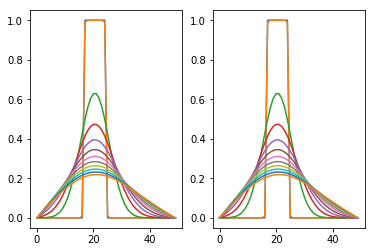

In [4]:


T0             = np.zeros(50, dtype=float)
T0[17:25]      = 1.

T1             = T0.copy()  # method 1  np.roll()
T2             = T0.copy()  # method 2  convolve()

do_me          = np.ones_like(T0, dtype=bool)
do_me[[0, -1]] = False    #  keep the boundaries of your bounding box fixed

a              = 0.01

hold_1         = [T0.copy()]
for i in range(10001):
    Ttemp      = T1 + a*(np.roll(T1, +1) + np.roll(T1, -1) - 2*T1)
    T1[do_me]  = Ttemp[do_me]
    if not i%1000:
        hold_1.append(T1.copy())

hold_2         = [T0.copy()]
kernel         = np.array([a, (1 - 2.*a), a])

for i in range(10001):
    Ttemp      = convolve(T2, kernel)
    T2[do_me]  = Ttemp[do_me]
    if not i%1000:
        hold_2.append(T2.copy())

if True:
    plt.figure()
    plt.subplot(1, 2, 1)
    for thing in hold_1:
        plt.plot(thing)

    plt.subplot(1, 2, 2)
    for thing in hold_2:
        plt.plot(thing)

    plt.show()